In [ ]:
!pip install nltk

In [ ]:
import pandas as pd
import nltk
import seaborn as sns
import os
import matplotlib.pyplot as plt
import numpy as np

##Dataset & Data Preprocessing

In [ ]:
url = "https://raw.githubusercontent.com/belongstocita/dataset/refs/heads/main/DatasetSA.csv"
df = pd.read_csv(url)
df

,Unnamed: 0.1,Date,Created,User ID,Followers,Following,Tweet Count,TweetLocation,Text,label,Unnamed: 0
0,0.0,2023-04-16 10:04:35+00:00,2023-03-27 08:59:57+00:00,1.640000e+18,981,531,22,NaN,anies president info,Positive,NaN
1,1.0,2023-04-16 10:00:01+00:00,2012-08-21 07:34:04+00:00,7.710306e+08,10702,123,30121,"Palmerah, Jakarta",gerindra party politician sandiaga uno answers...,Positive,NaN
2,2.0,2023-04-16 09:14:46+00:00,2011-09-27 05:22:24+00:00,3.807551e+08,11,35,230,North Jakarta,"mr. anies continued, we will guard him until h...",Positive,NaN
3,3.0,2023-04-16 07:03:05+00:00,2017-10-19 12:32:28+00:00,9.210000e+17,37,47,2670,Jakarta,may allah swt save the nation and state of the...,Positive,NaN
4,4.0,2023-04-16 06:03:59+00:00,2022-06-28 07:03:37+00:00,1.540000e+18,6,129,766,"Lebak, Banten","poor chotimah, uncle anies, that's why my fami...",Positive,NaN
...,...,...,...,...,...,...,...,...,...,...,...
29995,9995.0,2022-12-08 08:32:40+00:00,2016-09-30 15:25:40+00:00,7.820000e+17,50,104,4398,"East Kalimantan, Indonesia","sir, if the community always goes down, it wil...",Positive,NaN
29996,9996.0,2022-12-08 08:26:00+00:00,2022-11-07 06:41:27+00:00,1.590000e+18,23,122,131,Yogyakarta,"young prabowo is really cool, bismillah sir, g...",Positive,NaN
29997,9997.0,2022-12-08 08:06:00+00:00,2022-12-01 13:23:45+00:00,1.600000e+18,11,3,67,Surabaya,"basically, prabowo is great and was chosen as ...",Positive,NaN
29998,9998.0,2022-12-08 08:05:00+00:00,2022-12-02 02:44:35+00:00,1.600000e+18,50,83,103,NaN,optimistic about being the best figure in the ...,Positive,NaN


In [ ]:
df = df.loc[:, [' Tweet Count', 'Text', 'label']]
df = df.dropna()
df = df.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26170 entries, 0 to 29999
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0    Tweet Count  26170 non-null  int64 
 1   Text          26170 non-null  object
 2   label         26170 non-null  object
dtypes: int64(1), object(2)
memory usage: 817.8+ KB


##EDA

In [ ]:
df['label'].value_counts()

,count
label,
Positive,19152
Negative,7018


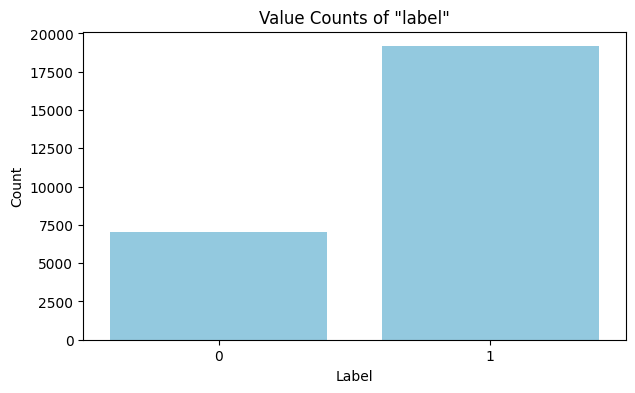

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

df['label'] = df['label'].map({'Positive': 1, 'Negative': 0})
plt.figure(figsize=(7, 4))
sns.countplot(x='label', data=df, color='skyblue')
plt.title('Value Counts of "label"')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

##Text Preprocessing

In [ ]:
import re, string
import nltk

#Remove punctuations, links, mentions and \r\n new line characters
def strip_all_entities(text):
    text = text.replace('\r', '').replace('\n', ' ').replace('\n', ' ').lower() #remove \n and \r and lowercase
    text = re.sub(r"(?:\@|https?\://)\S+", "", text) #remove links and mentions
    text = re.sub(r'[^\x00-\x7f]',r'', text) #remove non utf8/ascii characters such as '\x9a\x91\x97\x9a\x97'
    banned_list= string.punctuation + 'Ã'+'±'+'ã'+'¼'+'â'+'»'+'§'
    table = str.maketrans('', '', banned_list)
    text = text.translate(table)
    return text

#clean hashtags at the end of the sentence, and keep those in the middle of the sentence by removing just the # symbol
def clean_hashtags(tweet):
    new_tweet = " ".join(word.strip() for word in re.split('#(?!(?:hashtag)\b)[\w-]+(?=(?:\s+#[\w-]+)*\s*$)', tweet)) #remove last hashtags
    new_tweet2 = " ".join(word.strip() for word in re.split('#|_', new_tweet)) #remove hashtags symbol from words in the middle of the sentence
    return new_tweet2

#Filter special characters such as & and $ present in some words
def filter_chars(a):
    sent = []
    for word in a.split(' '):
        if ('$' in word) | ('&' in word):
            sent.append('')
        else:
            sent.append(word)
    return ' '.join(sent)

#Remove multiple spaces
def remove_mult_spaces(text):
    return re.sub("\s\s+" , " ", text)

In [ ]:
text_new = []
for t in df.Text:
    text_new.append(remove_mult_spaces(filter_chars(clean_hashtags(strip_all_entities(t)))))

df['clean_text'] = text_new
df.head()

,Tweet Count,Text,label,clean_text
0,22,anies president info,1,anies president info
1,30121,gerindra party politician sandiaga uno answers...,1,gerindra party politician sandiaga uno answers...
2,230,"mr. anies continued, we will guard him until h...",1,mr anies continued we will guard him until he ...
3,2670,may allah swt save the nation and state of the...,1,may allah swt save the nation and state of the...
4,766,"poor chotimah, uncle anies, that's why my fami...",1,poor chotimah uncle anies thats why my family ...


##Classification

In [ ]:
from sklearn import preprocessing
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

In [ ]:
X = df['clean_text']
y = df['label']

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(X)

In [ ]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42
)

Naive Bayes

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB

param_grid = {
    'alpha': [0.1, 0.5, 1.0, 2.0, 5.0]
}

nb_classifier = MultinomialNB()
grid_search = GridSearchCV(nb_classifier, param_grid, scoring='accuracy', cv=5)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)

print("Best Parameters:", grid_search.best_params_)
print("Best Model:", grid_search.best_estimator_)

Best Parameters: {'alpha': 0.1}
Best Model: MultinomialNB(alpha=0.1)


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score, classification_report, confusion_matrix

# Use best_model instead of model
y_pred = best_model.predict(X_test)  # Changed xtest to X_test
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)  # Changed ytest to y_test
# Calculate precision
precision = precision_score(y_test, y_pred)  # Changed ytest to y_test
# Calculate recall
recall = recall_score(y_test, y_pred)  # Changed ytest to y_test
# Calculate f1 score
f1 = f1_score(y_test, y_pred)  # Changed ytest to y_test

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.8746899882521864
Precision: 0.8758883248730964
Recall: 0.8799082100968894
F1 Score: 0.8778936657339099


Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.87      0.87      3739
           1       0.88      0.88      0.88      3922

    accuracy                           0.87      7661
   macro avg       0.87      0.87      0.87      7661
weighted avg       0.87      0.87      0.87      7661



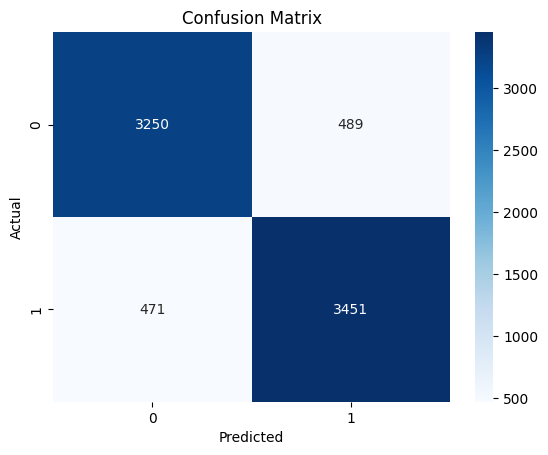

In [ ]:
report = classification_report(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("Classification Report:\n", report)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
print('0 = negative, 1 = positive')
for actual, predicted in zip(y_test[:15], y_pred[:15]):
    print(f"Actual: {actual}, Naive Bayes Predicted: {predicted}")

0 = negative, 1 = positive
Actual: 0, Naive Bayes Predicted: 0
Actual: 1, Naive Bayes Predicted: 1
Actual: 1, Naive Bayes Predicted: 1
Actual: 1, Naive Bayes Predicted: 1
Actual: 0, Naive Bayes Predicted: 0
Actual: 0, Naive Bayes Predicted: 0
Actual: 1, Naive Bayes Predicted: 1
Actual: 1, Naive Bayes Predicted: 1
Actual: 1, Naive Bayes Predicted: 1
Actual: 0, Naive Bayes Predicted: 1
Actual: 1, Naive Bayes Predicted: 1
Actual: 0, Naive Bayes Predicted: 0
Actual: 1, Naive Bayes Predicted: 1
Actual: 1, Naive Bayes Predicted: 1
Actual: 1, Naive Bayes Predicted: 1
